In [24]:
import pandas as pd
from pandas import to_datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime
import numpy as np

In [2]:
all_df = pd.read_json('https://retail-sales-data.herokuapp.com/alldata')

In [3]:
all_df.head()

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
0,1981-09-26 00:00:00.000000,M,01-01,-5,-772,R,e-Shop,405.300,San Fransisco,5.0,...,0,Clothing,1,Women,1,California,-4265.300,2014-02-28,80712190438,94108.0
1,1981-09-26 00:00:00.000000,M,01-01,5,772,S,e-Shop,405.300,San Fransisco,5.0,...,1,Clothing,1,Women,1,California,4265.300,2014-02-20,80712190438,94108.0
2,1981-08-06 00:00:00.000000,M,01-01,3,1229,S,Flagship store,387.135,Las Vegas,3.0,...,2,Clothing,1,Women,1,Nevada,4074.135,2013-12-16,18505840838,89107.0
3,1986-10-13 00:00:00.000000,M,01-01,-4,-284,R,Flagship store,119.280,Denver,1.0,...,3,Clothing,1,Women,1,Colorado,-1255.280,2013-08-16,92814475704,80202.0
4,1986-10-13 00:00:00.000000,M,01-01,4,284,S,Flagship store,119.280,Denver,1.0,...,4,Clothing,1,Women,1,Colorado,1255.280,2013-08-07,92814475704,80202.0


In [4]:
all_df['tran_date'] = pd.to_datetime(all_df['tran_date'], format='%Y-%m-%d')
all_df['tran_date'] = all_df['tran_date'].dt.strftime('%Y-%m')
all_df.head()

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
0,1981-09-26 00:00:00.000000,M,01-01,-5,-772,R,e-Shop,405.300,San Fransisco,5.0,...,0,Clothing,1,Women,1,California,-4265.300,2014-02,80712190438,94108.0
1,1981-09-26 00:00:00.000000,M,01-01,5,772,S,e-Shop,405.300,San Fransisco,5.0,...,1,Clothing,1,Women,1,California,4265.300,2014-02,80712190438,94108.0
2,1981-08-06 00:00:00.000000,M,01-01,3,1229,S,Flagship store,387.135,Las Vegas,3.0,...,2,Clothing,1,Women,1,Nevada,4074.135,2013-12,18505840838,89107.0
3,1986-10-13 00:00:00.000000,M,01-01,-4,-284,R,Flagship store,119.280,Denver,1.0,...,3,Clothing,1,Women,1,Colorado,-1255.280,2013-08,92814475704,80202.0
4,1986-10-13 00:00:00.000000,M,01-01,4,284,S,Flagship store,119.280,Denver,1.0,...,4,Clothing,1,Women,1,Colorado,1255.280,2013-08,92814475704,80202.0


In [5]:
df = all_df[all_df['Store_type'] == 'e-Shop']
df.head()

,DOB,Gender,Item,Qty,Rate,Sale/Return,Store_type,Tax,city,city_code,...,id,prod_cat,prod_cat_code,prod_subcat,prod_subcat_code,state,total_amt,tran_date,transaction_id,zip
0,1981-09-26 00:00:00.000000,M,01-01,-5,-772,R,e-Shop,405.300,San Fransisco,5.0,...,0,Clothing,1,Women,1,California,-4265.300,2014-02,80712190438,94108.0
1,1981-09-26 00:00:00.000000,M,01-01,5,772,S,e-Shop,405.300,San Fransisco,5.0,...,1,Clothing,1,Women,1,California,4265.300,2014-02,80712190438,94108.0
8,1984-07-15 00:00:00.000000,F,01-01,3,1181,S,e-Shop,372.015,Miami,8.0,...,8,Clothing,1,Women,1,Florida,3915.015,2012-12,99335419136,33127.0
10,1971-03-12 00:00:00.000000,M,01-01,2,98,S,e-Shop,20.580,NewYork,6.0,...,10,Clothing,1,Women,1,NewYork,216.580,2012-12,24344788054,10007.0
12,1977-06-27 00:00:00.000000,F,01-01,5,112,S,e-Shop,58.800,NewYork,6.0,...,12,Clothing,1,Women,1,NewYork,618.800,2013-10,33886188672,10007.0


In [6]:
df = df[all_df['total_amt'] > 0]
df = df.loc[:,['tran_date','total_amt']].groupby('tran_date', as_index=False)['total_amt'].sum()
df.head()

C:\Users\dmbor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tran_date,total_amt
0,2011-01,139874.215
1,2011-02,555944.285
2,2011-03,671538.335
3,2011-04,648748.815
4,2011-05,555716.655


In [7]:
# eshop_df['tran_date'] = to_datetime(eshop_df['tran_date'])
# # eshop_df['tran_date'] = eshop_df['tran_date'].dt.to_period('M')
# eshop_df.head()
# eshop_df['ds'] = eshop_df.index
df.dtypes

tran_date     object
total_amt    float64
dtype: object

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds           yhat     yhat_lower     yhat_upper
0 2012-01-01  373867.408494  282325.547153  469662.026013
1 2012-02-01  570100.491093  476247.954144  662092.307594
2 2012-03-01  650936.024465  554040.806419  749817.629387
3 2012-04-01  565180.594197  468775.068927  660578.411561
4 2012-05-01  603224.910908  510468.900748  695552.503057


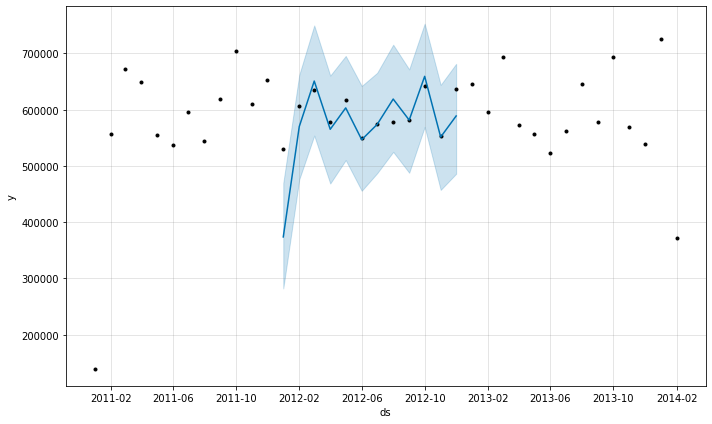

In [22]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '2012-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


           ds           y
21 2012-10-01  642588.440
22 2012-11-01  553092.280
23 2012-12-01  636876.695
24 2013-01-01  645224.970
25 2013-02-01  596524.305
MAE: 119261.512


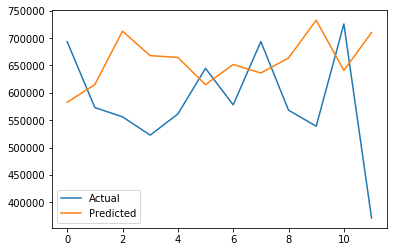

In [23]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '2013-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()